<a href="https://colab.research.google.com/github/JhanXXX/AI-in-Transport-TTGTM/blob/main/Exercise_4_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A. Load dataset

In [25]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


B. Preview: using wordcloud

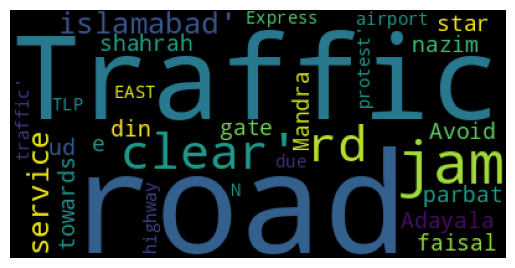

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

B. Preview: dataset infomation

In [27]:
# Displaying the data types and quality
print(df.info())
# Displaying the instances of each class
df.groupby('Sentiment').describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB
None


Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

-  The difference between column of "unique" and count means the dataset has duplicate rows, and duplicate rows could bias a machine learning model.

In [28]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

NB: Here the data cleaning has considered on the scale of data rows instead of the data itself. Completely the same and repetitive data can be distracting.

However, to me the question still remains: if the sentences are slightly different: punctuations, order of certain phrase, e.g., same verb with different prep. in different sentence structures, etc. May similar sentences may the model better understand the text? Or is there a threshold for that?

C. Text to numeric data

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Splite the train and test data
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Convert the text to vectorizer
# Test different vectorizer

# Create the CountVectorizer instance, the ngram_range represents the length range
# of phrase segmentation,the stop_words parameter is set to "english" to remove
# common English stop words like "and", "the", and "a", min_df is to serve as a
# threshold to delete some words which have a frequency lower then min_df.

Vectorizer = {}
X_Train = {}
X_Test = {}

#(1) CountVectorizer
Vectorizer["CountVectorizer"] = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)
X_Train["CountVectorizer"] = Vectorizer["CountVectorizer"].fit_transform(x_train)
X_Test["CountVectorizer"] = Vectorizer["CountVectorizer"].transform(x_test)

#(2) #HashingVectorizer
Vectorizer["HashingVectorizer"] = HashingVectorizer(ngram_range=(1, 2), n_features=200)
X_Train["HashingVectorizer"] = Vectorizer["HashingVectorizer"].fit_transform(x_train)
X_Test["HashingVectorizer"] = Vectorizer["HashingVectorizer"].transform(x_test)

#(3)TfidfVectorizer
Vectorizer["TFidfVectorizer"] = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )
X_Train["TFidfVectorizer"] = Vectorizer["TFidfVectorizer"].fit_transform(x_train)
X_Test["TFidfVectorizer"] = Vectorizer["TFidfVectorizer"].transform(x_test)

# NB: fit_transform(x_train): fit-learn the words (from sentence to the word dict);
#     transform-transform the word dict into numerical data;
#     transform(x_test): transforms the new data (x_test) based on the vocabulary
#     learned from the training data (x_train). It does not re-learn the vocabulary,
#     ensuring that the features used during testing are consistent with those
#     used during training.
# Which is why, fit_transform for training set and transform for testing set,
#     order sensitive as well.

Best_score={}
Best_params={}

Above, there is actually also a "max_df" in the vectorizer function. For example, setting max_df=0.95 means the words appearing more than 95% in the document will be ignored. However I didn't include this parameter here.

In [30]:
# Try out the model

text = 'Adayala road is clear'

def try_model(text, model, vectorizer):
# Make a prediction for this review
  score=model.predict_proba(vectorizer.transform([text]))[0][1]
  if score >0.5:
    attitude='negative'
  else:
    attitude='positive'
  print('The prediction result of this review is: '+ attitude)

D.1 Train a classifier - logistic regression

Best parameters:  {'C': 1}
The accuracy of the LR model using CountVectorizer with GridSearch is: 0.937799043062201
Best parameters found with Random Search:  {'C': 1}
The accuracy of theLR model using CountVectorizer with RandomSearch is: 0.937799043062201
Best parameters:  {'C': 10}
The accuracy of the LR model using HashingVectorizer with GridSearch is: 0.9521531100478469
Best parameters found with Random Search:  {'C': 10}
The accuracy of theLR model using HashingVectorizer with RandomSearch is: 0.9521531100478469
Best parameters:  {'C': 0.1}
The accuracy of the LR model using TFidfVectorizer with GridSearch is: 0.9545454545454546
Best parameters found with Random Search:  {'C': 0.1}
The accuracy of theLR model using TFidfVectorizer with RandomSearch is: 0.9545454545454546


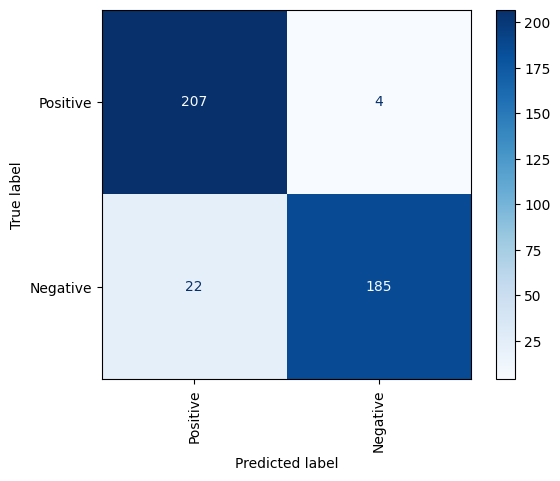

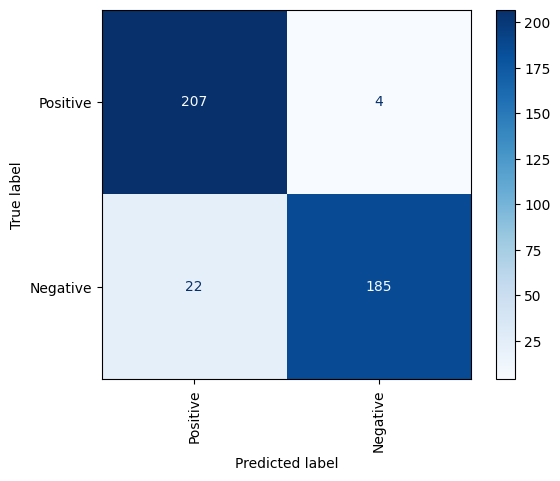

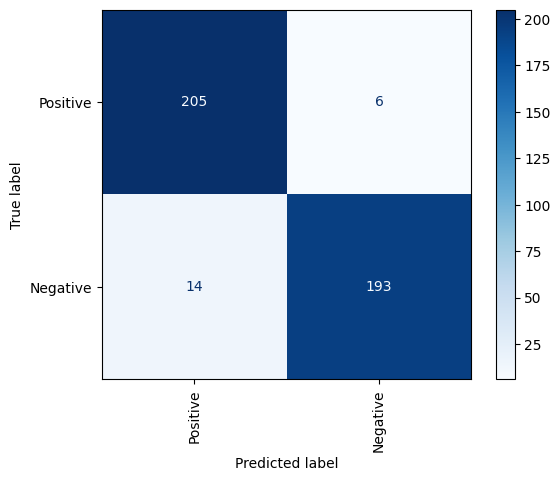

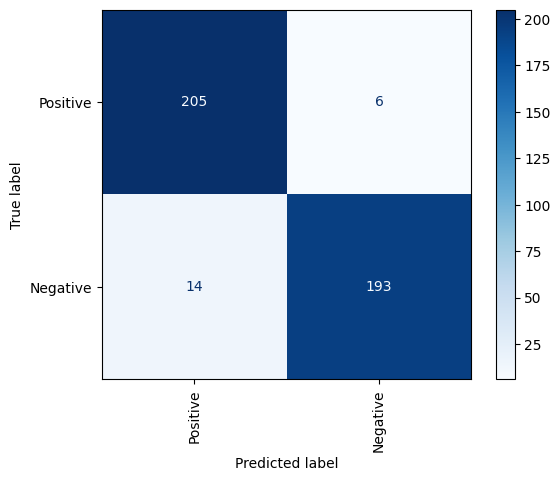

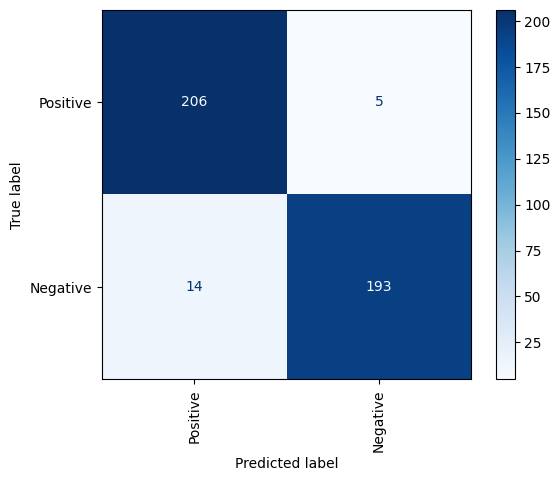

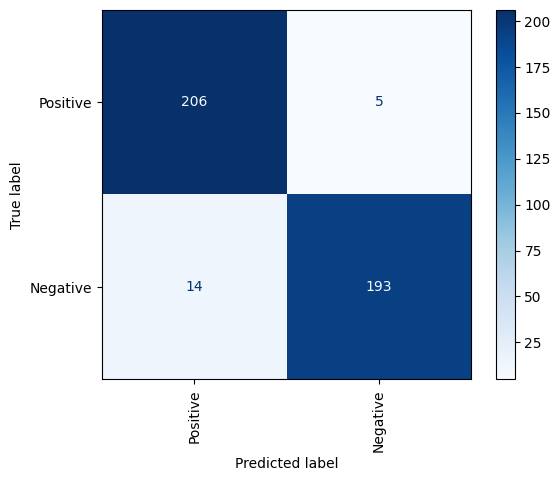

In [31]:
#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
NAME = "LR"
Best_score[NAME]={}
Best_params[NAME]={}

for i in X_Train.keys():
  x_train_vectorized = X_Train[i]
  x_test_vectorized = X_Test[i]
  Best_score[NAME][i]={}
  Best_params[NAME][i]={}

# Grid search to find the best parameter
  param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 500, 800, 1000],
    }

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
  best_params = grid_search.best_params_
  print("Best parameters: ",best_params)
  best_score = grid_search.best_score_
  Best_score[NAME][i]["GridSearch"] = best_score
  Best_params[NAME][i]["GridSearch"] = best_params

# Updatd with the best estimator found,
  model = grid_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the ' + NAME +' model using '+i+' with GridSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

# Use RandomizedSearchCV
  random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Fit the random search to the training data
  random_search.fit(x_train_vectorized, y_train)

# Extract the best hyperparameters and their corresponding accuracy score
  best_params = random_search.best_params_
  print("Best parameters found with Random Search: ", best_params)
  best_score = random_search.best_score_
  Best_score[NAME][i]["RandomSearch"] = best_score
  Best_params[NAME][i]["RandomSearch"] = best_params
# Update the model with the best estimator found during Random Search
  model = random_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the'+NAME+' model using '+i+' with RandomSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

D.2 Train a classifier - KNN

Best parameters:  {'n_neighbors': 5, 'weights': 'uniform'}
The accuracy of the KNN model using CountVectorizer with GridSearch is: 0.9473684210526315
Best parameters found with Random Search:  {'weights': 'uniform', 'n_neighbors': 5}
The accuracy of theKNN model using CountVectorizer with RandomSearch is: 0.9473684210526315
Best parameters:  {'n_neighbors': 12, 'weights': 'distance'}
The accuracy of the KNN model using HashingVectorizer with GridSearch is: 0.9688995215311005
Best parameters found with Random Search:  {'weights': 'distance', 'n_neighbors': 12}
The accuracy of theKNN model using HashingVectorizer with RandomSearch is: 0.9688995215311005
Best parameters:  {'n_neighbors': 12, 'weights': 'distance'}
The accuracy of the KNN model using TFidfVectorizer with GridSearch is: 0.937799043062201
Best parameters found with Random Search:  {'weights': 'distance', 'n_neighbors': 12}
The accuracy of theKNN model using TFidfVectorizer with RandomSearch is: 0.937799043062201


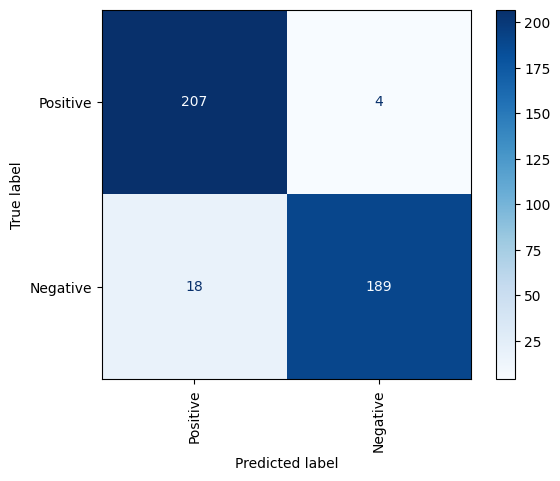

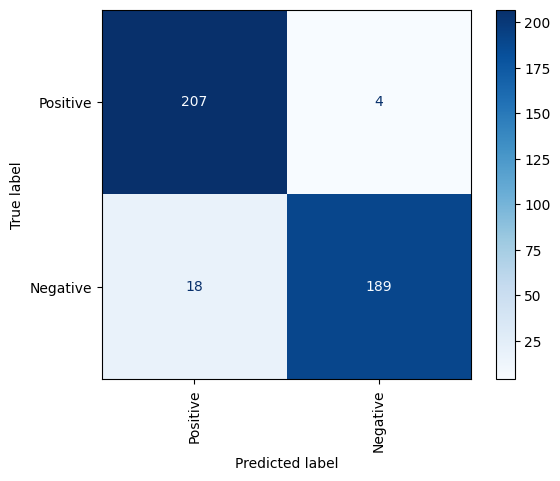

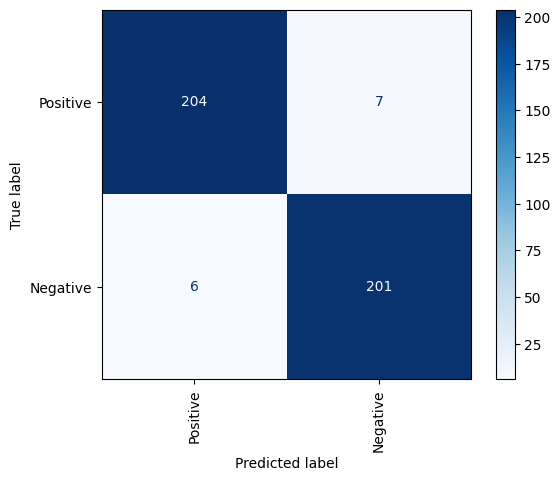

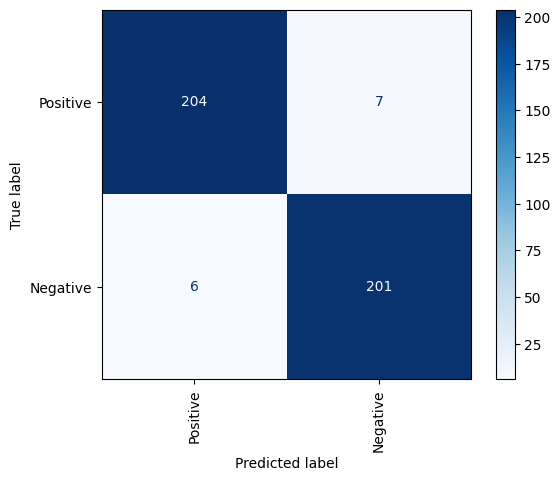

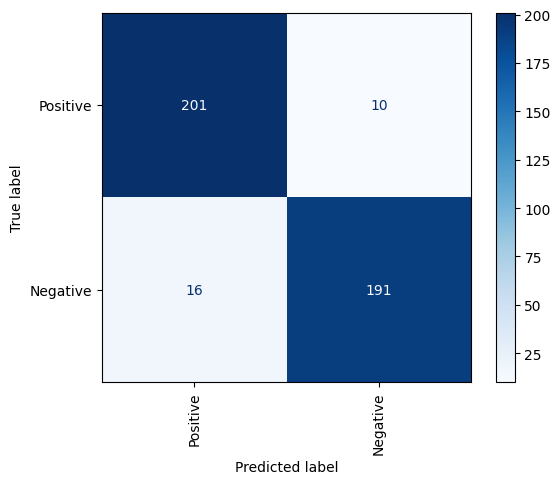

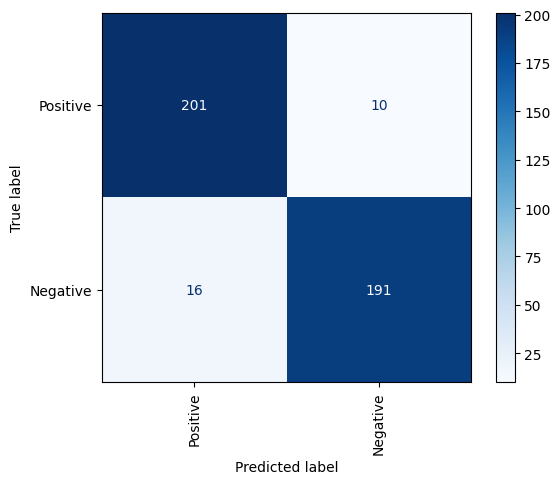

In [32]:
#(2)KNN
model=KNeighborsClassifier()

NAME = "KNN"
Best_score[NAME]={}
Best_params[NAME]={}

for i in X_Train.keys():
  x_train_vectorized = X_Train[i]
  x_test_vectorized = X_Test[i]
  Best_score[NAME][i]={}
  Best_params[NAME][i]={}

# Grid search to find the best parameter
  param_grid = {
    'n_neighbors': [3, 5, 7, 9, 12],
    'weights': ['uniform', 'distance']
    }

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
  best_params = grid_search.best_params_
  print("Best parameters: ",best_params)
  best_score = grid_search.best_score_
  Best_score[NAME][i]["GridSearch"] = best_score
  Best_params[NAME][i]["GridSearch"] = best_params

# Updatd with the best estimator found,
  model = grid_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the ' + NAME +' model using '+i+' with GridSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

# Use RandomizedSearchCV
  random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Fit the random search to the training data
  random_search.fit(x_train_vectorized, y_train)

# Extract the best hyperparameters and their corresponding accuracy score
  best_params = random_search.best_params_
  print("Best parameters found with Random Search: ", best_params)
  best_score = random_search.best_score_
  Best_score[NAME][i]["RandomSearch"] = best_score
  Best_params[NAME][i]["RandomSearch"] = best_params
# Update the model with the best estimator found during Random Search
  model = random_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the'+NAME+' model using '+i+' with RandomSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

D.3 Train a classifier - RF

Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
The accuracy of the RF model using CountVectorizer with GridSearch is: 0.9330143540669856
Best parameters found with Random Search:  {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
The accuracy of theRF model using CountVectorizer with RandomSearch is: 0.9282296650717703
Best parameters:  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
The accuracy of the RF model using HashingVectorizer with GridSearch is: 0.9712918660287081
Best parameters found with Random Search:  {'n_estimators': 80, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 15}
The accuracy of theRF model using HashingVectorizer with RandomSearch is: 0.9688995215311005
Best parameters:  {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
The accuracy of the RF model using TFidfVectorizer with GridSearch 

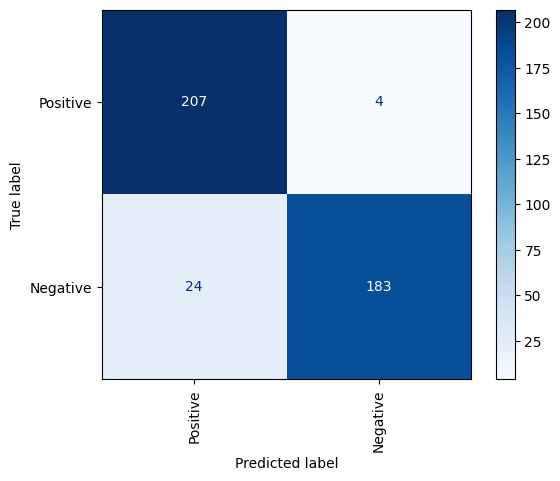

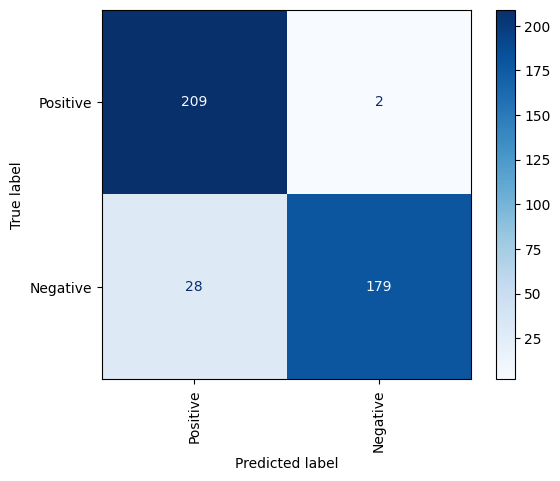

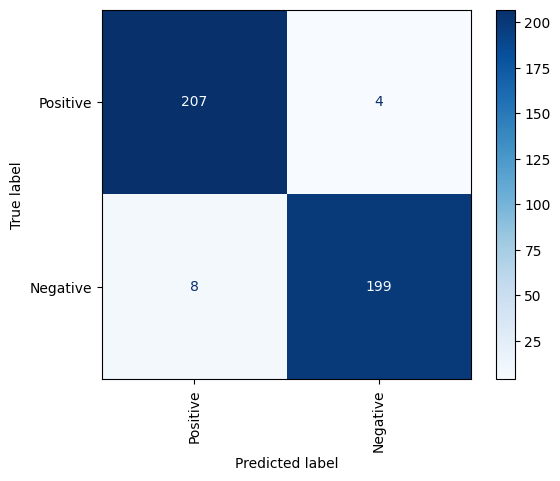

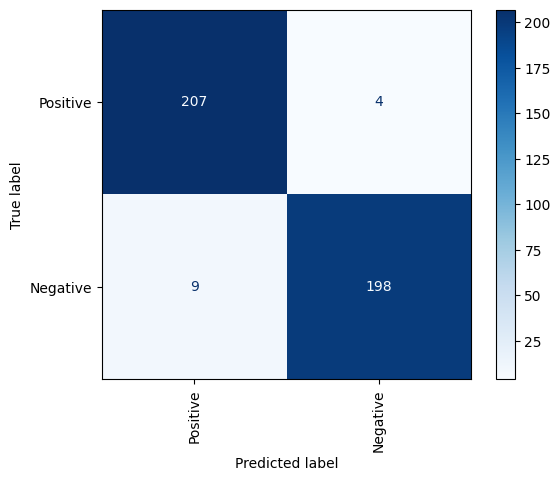

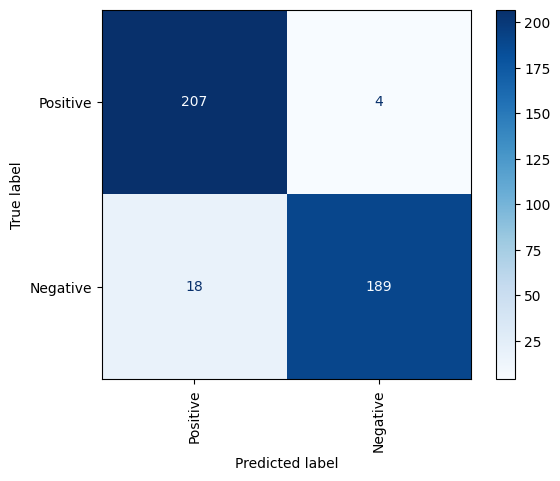

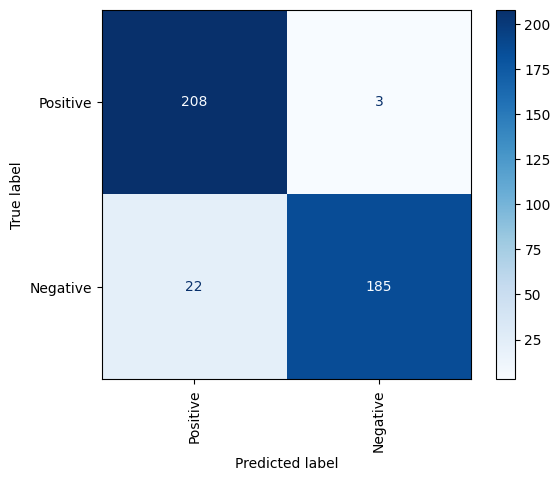

In [35]:
#(3)RF
model = RandomForestClassifier(random_state=0)

NAME = "RF"
Best_score[NAME]={}
Best_params[NAME]={}

for i in X_Train.keys():
  x_train_vectorized = X_Train[i]
  x_test_vectorized = X_Test[i]
  Best_score[NAME][i]={}
  Best_params[NAME][i]={}

# Grid search to find the best parameter
  param_grid = {
    'n_estimators': [50, 80, 100],
    'max_depth': [8, 10, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
    }

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
  best_params = grid_search.best_params_
  print("Best parameters: ",best_params)
  best_score = grid_search.best_score_
  Best_score[NAME][i]["GridSearch"] = best_score
  Best_params[NAME][i]["GridSearch"] = best_params

# Updatd with the best estimator found,
  model = grid_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the ' + NAME +' model using '+i+' with GridSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

# Use RandomizedSearchCV
  random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Fit the random search to the training data
  random_search.fit(x_train_vectorized, y_train)

# Extract the best hyperparameters and their corresponding accuracy score
  best_params = random_search.best_params_
  print("Best parameters found with Random Search: ", best_params)
  best_score = random_search.best_score_
  Best_score[NAME][i]["RandomSearch"] = best_score
  Best_params[NAME][i]["RandomSearch"] = best_params
# Update the model with the best estimator found during Random Search
  model = random_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the'+NAME+' model using '+i+' with RandomSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))


Here with random forest, I changed some of the parameters because it was taking too long to generate the results

D.4 Train a classifier - XGBoost

Best parameters:  {'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 300}
The accuracy of the XGBoost model using CountVectorizer with GridSearch is: 0.9569377990430622
Best parameters found with Random Search:  {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
The accuracy of theXGBoost model using CountVectorizer with RandomSearch is: 0.9521531100478469
Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
The accuracy of the XGBoost model using HashingVectorizer with GridSearch is: 0.9784688995215312
Best parameters found with Random Search:  {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}
The accuracy of theXGBoost model using HashingVectorizer with RandomSearch is: 0.9736842105263158
Best parameters:  {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 200}
The accuracy of the XGBoost model using TFidfVectorizer with GridSearch is: 0.9712918660287081
Best parameters found with Random Search:  {'n_estimators': 100, 'max_depth':

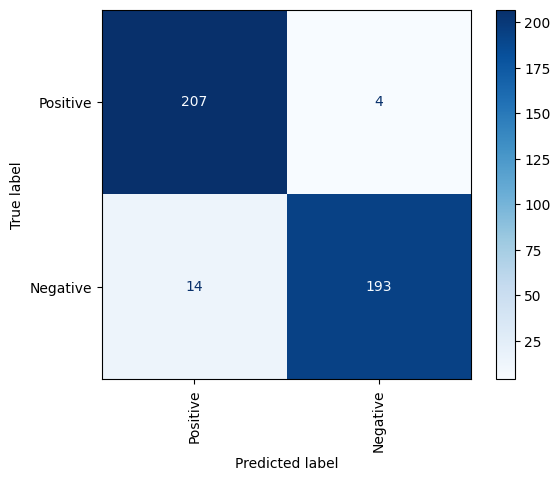

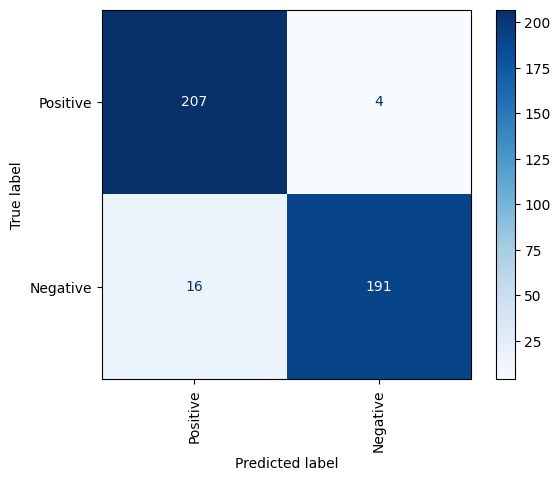

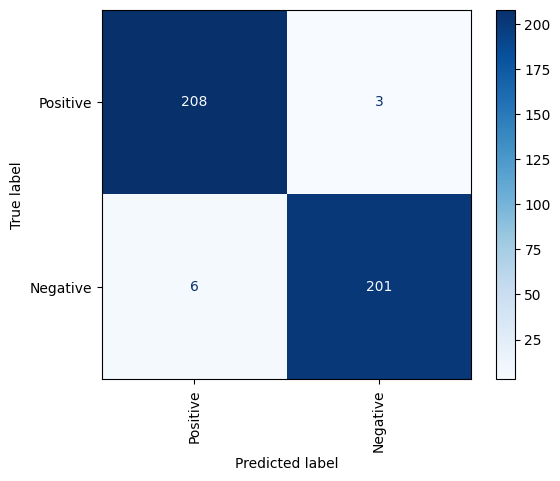

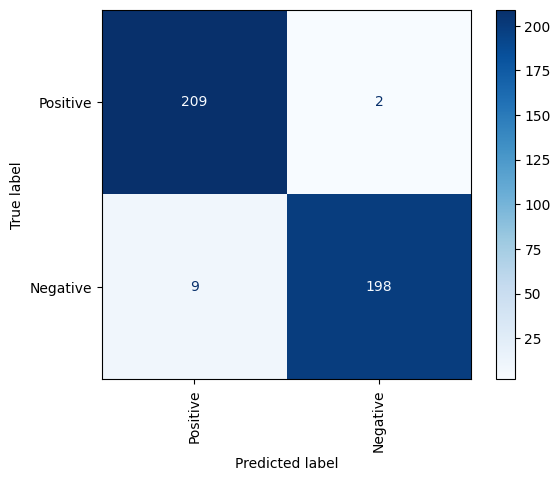

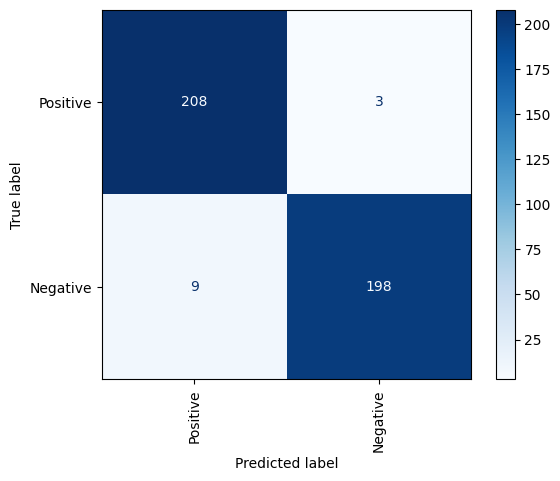

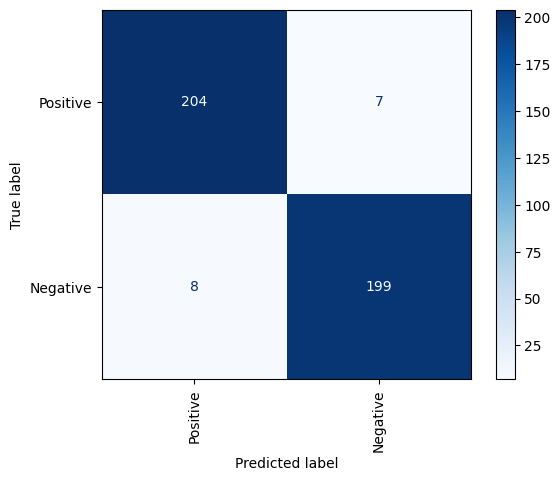

In [36]:
#(4)XGBoost

NAME = "XGBoost"
Best_score[NAME]={}
Best_params[NAME]={}

for i in X_Train.keys():
  x_train_vectorized = X_Train[i]
  x_test_vectorized = X_Test[i]
  Best_score[NAME][i]={}
  Best_params[NAME][i]={}

# Grid search to find the best parameter
  model =  XGBClassifier()
  param_grid = {
    'learning_rate': [0.01, 0.1, 0.15],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
  }

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
  best_params = grid_search.best_params_
  print("Best parameters: ",best_params)
  best_score = grid_search.best_score_
  Best_score[NAME][i]["GridSearch"] = best_score
  Best_params[NAME][i]["GridSearch"] = best_params

# Updatd with the best estimator found,
  model = grid_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the ' + NAME +' model using '+i+' with GridSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

# Use RandomizedSearchCV
  random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Fit the random search to the training data
  random_search.fit(x_train_vectorized, y_train)

# Extract the best hyperparameters and their corresponding accuracy score
  best_params = random_search.best_params_
  print("Best parameters found with Random Search: ", best_params)
  best_score = random_search.best_score_
  Best_score[NAME][i]["RandomSearch"] = best_score
  Best_params[NAME][i]["RandomSearch"] = best_params
# Update the model with the best estimator found during Random Search
  model = random_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the'+NAME+' model using '+i+' with RandomSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

D.5 Train a classifier - SVM

Best parameters:  {'C': 10}
The accuracy of the SVC model using CountVectorizer with GridSearch is: 0.9569377990430622
Best parameters found with Random Search:  {'C': 10}
The accuracy of theSVC model using CountVectorizer with RandomSearch is: 0.9569377990430622
Best parameters:  {'C': 10}
The accuracy of the SVC model using HashingVectorizer with GridSearch is: 0.9712918660287081
Best parameters found with Random Search:  {'C': 10}
The accuracy of theSVC model using HashingVectorizer with RandomSearch is: 0.9712918660287081
Best parameters:  {'C': 0.1}
The accuracy of the SVC model using TFidfVectorizer with GridSearch is: 0.9593301435406698
Best parameters found with Random Search:  {'C': 0.1}
The accuracy of theSVC model using TFidfVectorizer with RandomSearch is: 0.9593301435406698


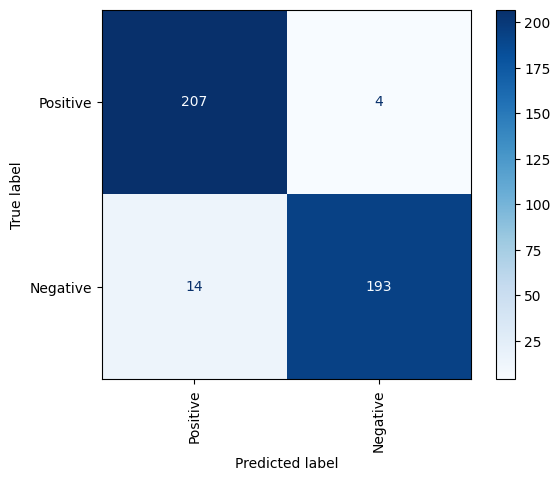

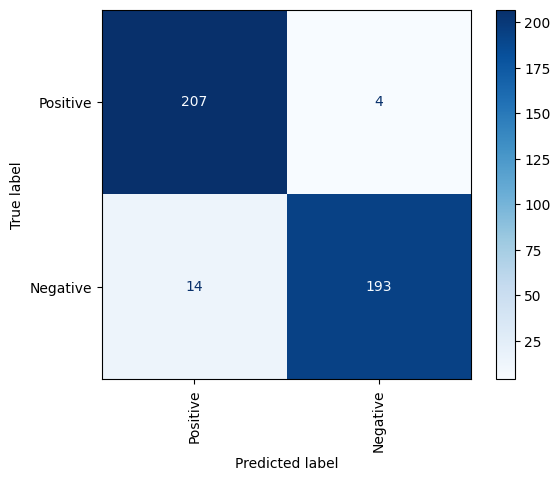

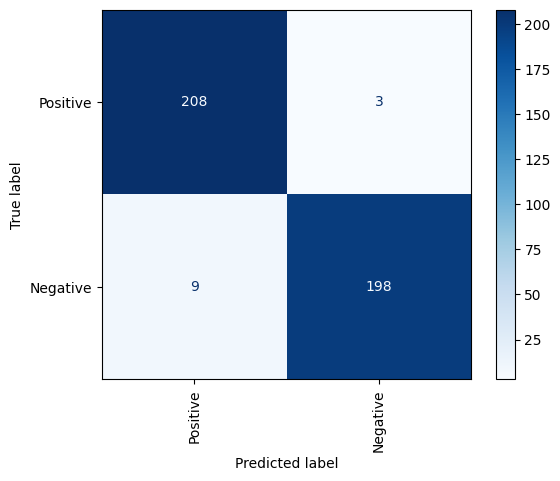

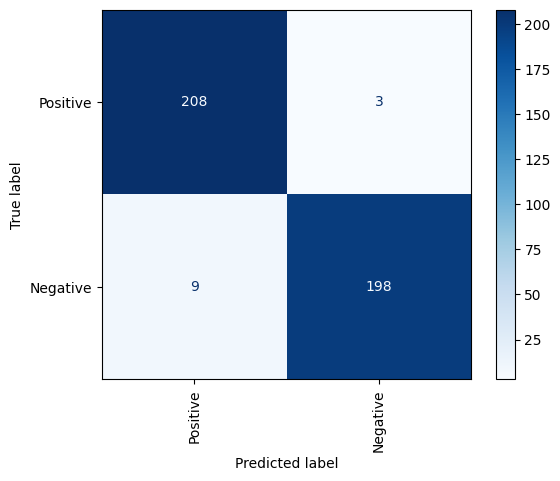

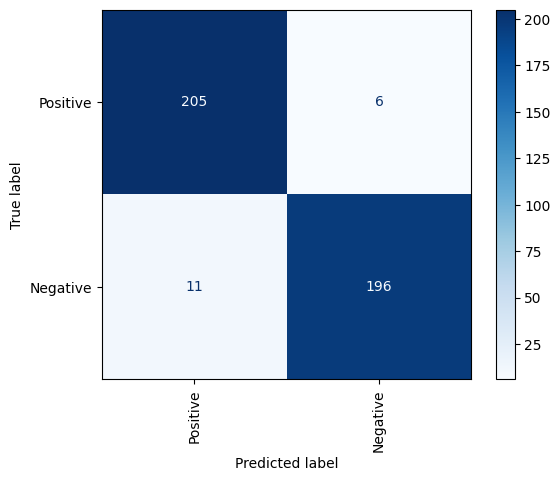

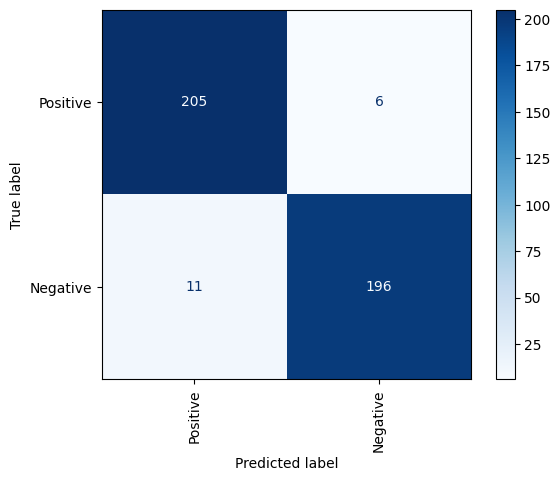

In [39]:
model = SVC(probability=True)
NAME = "SVC"
Best_score[NAME]={}
Best_params[NAME]={}

for i in X_Train.keys():
  x_train_vectorized = X_Train[i]
  x_test_vectorized = X_Test[i]
  Best_score[NAME][i]={}
  Best_params[NAME][i]={}

# Grid search to find the best parameter
  param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 120, 150],
    }

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
  best_params = grid_search.best_params_
  print("Best parameters: ",best_params)
  best_score = grid_search.best_score_
  Best_score[NAME][i]["GridSearch"] = best_score
  Best_params[NAME][i]["GridSearch"] = best_params

# Updatd with the best estimator found,
  model = grid_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the ' + NAME +' model using '+i+' with GridSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

# Use RandomizedSearchCV
  random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Fit the random search to the training data
  random_search.fit(x_train_vectorized, y_train)

# Extract the best hyperparameters and their corresponding accuracy score
  best_params = random_search.best_params_
  print("Best parameters found with Random Search: ", best_params)
  best_score = random_search.best_score_
  Best_score[NAME][i]["RandomSearch"] = best_score
  Best_params[NAME][i]["RandomSearch"] = best_params
# Update the model with the best estimator found during Random Search
  model = random_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the'+NAME+' model using '+i+' with RandomSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))


D.6 Train a classifier - Naïve Bayes models

Best parameters:  {'alpha': 2, 'force_alpha': True}
The accuracy of the NB model using CountVectorizer with GridSearch is: 0.9425837320574163
Best parameters found with Random Search:  {'force_alpha': True, 'alpha': 2}
The accuracy of theNB model using CountVectorizer with RandomSearch is: 0.9425837320574163
Best parameters:  {'alpha': 1, 'force_alpha': True}
The accuracy of the NB model using HashingVectorizer with GridSearch is: 0.8349282296650717
Best parameters found with Random Search:  {'force_alpha': True, 'alpha': 1}
The accuracy of theNB model using HashingVectorizer with RandomSearch is: 0.8349282296650717
Best parameters:  {'alpha': 1.5, 'force_alpha': True}
The accuracy of the NB model using TFidfVectorizer with GridSearch is: 0.9401913875598086
Best parameters found with Random Search:  {'force_alpha': True, 'alpha': 2}
The accuracy of theNB model using TFidfVectorizer with RandomSearch is: 0.9401913875598086


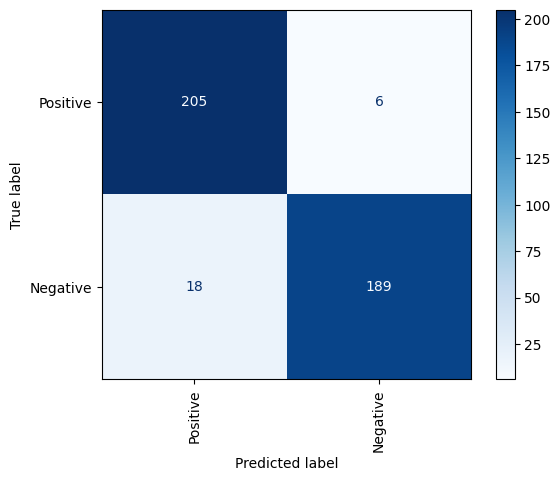

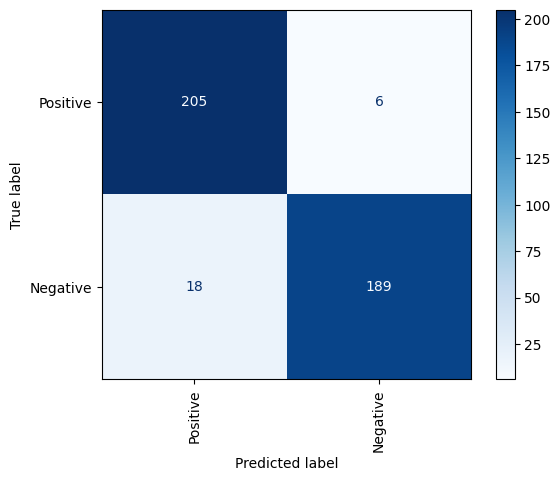

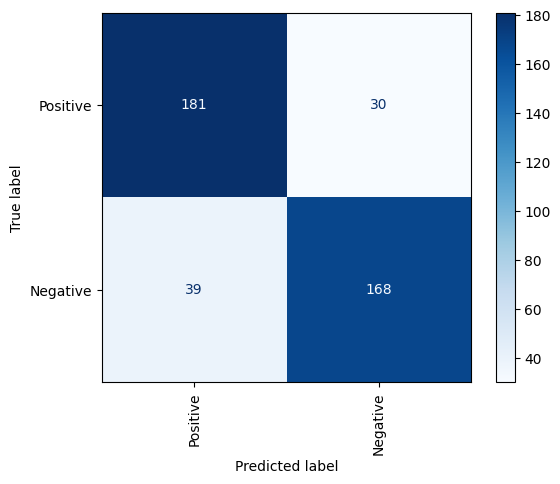

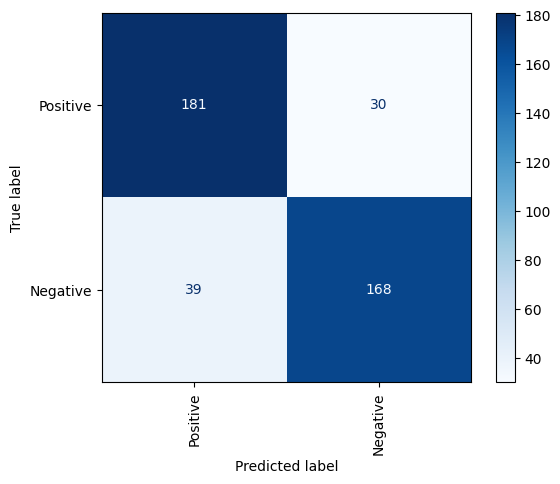

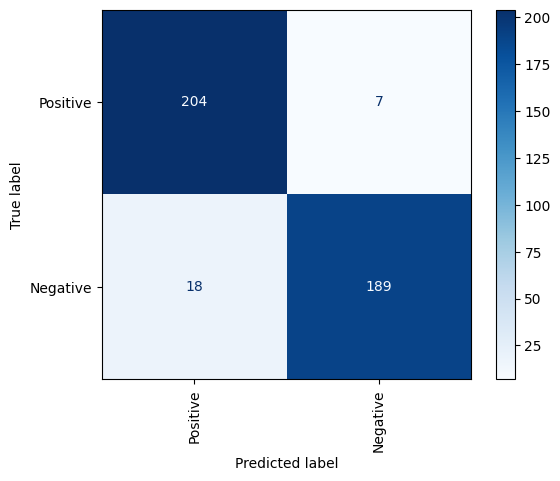

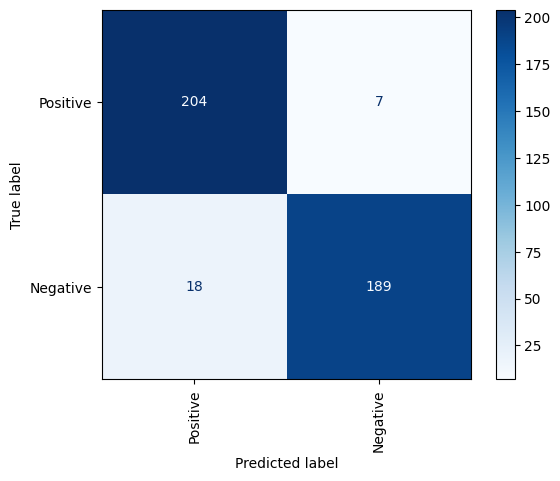

In [43]:
#(6)Naïve Bayes models
model=BernoulliNB()
NAME = "NB"
Best_score[NAME]={}
Best_params[NAME]={}

for i in X_Train.keys():
  x_train_vectorized = X_Train[i]
  x_test_vectorized = X_Test[i]
  Best_score[NAME][i]={}
  Best_params[NAME][i]={}

# Grid search to find the best parameter
  param_grid = {'alpha': [0.5, 1, 1.2, 1.5, 2, 2.5, 3,5],'force_alpha': [True,False]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
  grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
  best_params = grid_search.best_params_
  print("Best parameters: ",best_params)
  best_score = grid_search.best_score_
  Best_score[NAME][i]["GridSearch"] = best_score
  Best_params[NAME][i]["GridSearch"] = best_params

# Updatd with the best estimator found,
  model = grid_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the ' + NAME +' model using '+i+' with GridSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

# Use RandomizedSearchCV
  random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Fit the random search to the training data
  random_search.fit(x_train_vectorized, y_train)

# Extract the best hyperparameters and their corresponding accuracy score
  best_params = random_search.best_params_
  print("Best parameters found with Random Search: ", best_params)
  best_score = random_search.best_score_
  Best_score[NAME][i]["RandomSearch"] = best_score
  Best_params[NAME][i]["RandomSearch"] = best_params
# Update the model with the best estimator found during Random Search
  model = random_search.best_estimator_
  cmd.from_estimator(
      model,
      x_test_vectorized,
      y_test,
      display_labels=['Positive','Negative'],
      cmap='Blues',
      xticks_rotation='vertical'
    )
#calculate accuracy
  print('The accuracy of the'+NAME+' model using '+i+' with RandomSearch is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))



See what we have got for the best scores: for models and vectorizers

In [48]:
print (Best_params.keys())
print()
for i in Best_params.keys():
  print(i)
  for j in Best_params[i].keys():
    print(j)
    print("Best params: ",Best_params[i][j])
    print ("Best score: ",Best_score[i][j])
  print()

dict_keys(['LR', 'KNN', 'RF', 'XGBoost', 'SVC', 'NB'])

LR
CountVectorizer
Best params:  {'GridSearch': {'C': 1}, 'RandomSearch': {'C': 1}}
Best score:  {'GridSearch': 0.9490730251209293, 'RandomSearch': 0.9490730251209293}
HashingVectorizer
Best params:  {'GridSearch': {'C': 10}, 'RandomSearch': {'C': 10}}
Best score:  {'GridSearch': 0.9556670442897988, 'RandomSearch': 0.9556670442897988}
TFidfVectorizer
Best params:  {'GridSearch': {'C': 0.1}, 'RandomSearch': {'C': 0.1}}
Best score:  {'GridSearch': 0.9532700365035695, 'RandomSearch': 0.9532700365035695}

KNN
CountVectorizer
Best params:  {'GridSearch': {'n_neighbors': 5, 'weights': 'uniform'}, 'RandomSearch': {'weights': 'uniform', 'n_neighbors': 5}}
Best score:  {'GridSearch': 0.9382981784179389, 'RandomSearch': 0.9382981784179389}
HashingVectorizer
Best params:  {'GridSearch': {'n_neighbors': 12, 'weights': 'distance'}, 'RandomSearch': {'weights': 'distance', 'n_neighbors': 12}}
Best score:  {'GridSearch': 0.9442844041646439, 'Rand

The best solution here is with SVC, HashingVectorizer:
Best params:  {'GridSearch': {'C': 10}, 'RandomSearch': {'C': 10}}
Best score:  {'GridSearch': 0.9724443005880131, 'RandomSearch': 0.9724443005880131}

During the training process, I also found that Random Forest appears to be the slowest, taking over minutes, while Naïve Bayes model is done within seconds.

During the training process, some warnings popped up using the default parameters in the guidebooks, showing that the set searching space could not cover desired data; sometimes it appeared to be really slow and taking ages running, so I made some slight changes for the parameter grids.